# Bank Customer Churn Prediction

### Objective:
Predict whether a bank customer will leave the bank in the next 6 months using a **neural network**.

### Steps:
1. Load the dataset
2. Preprocess the data (encoding categorical features, normalization)
3. Split data into training and test sets
4. Build and train a neural network
5. Experiment with epochs and activation functions
6. Evaluate the model using accuracy and confusion matrix


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Step 1: Load the Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print("Initial shape:", df.shape)

Initial shape: (10000, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Step 2: Preprocessing
- Drop irrelevant columns: `RowNumber`, `CustomerId`, `Surname`
- Encode categorical features: `Geography` and `Gender`
- Split features (`X`) and target (`y`)


In [5]:
# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
# Encode categorical variables
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_geo = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Build Neural Network
- Start with a simple architecture
- Experiment with different **activation functions** and **epochs**

In [13]:
def build_and_train_nn(X_train, y_train, X_test, y_test, 
                       hidden_layers=[64,32], activation='relu', epochs=50):
    # Initialize model
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=X_train.shape[1], activation=activation))
    
    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=0)
    
    # Predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Activation: {activation}, Epochs: {epochs}")
    print(f"Accuracy: {acc:.3f}")
    print("Confusion Matrix:\n", cm)
    
    return model, history


In [18]:
# Experiment with different activations and epochs
activations = ['relu', 'tanh', 'sigmoid']
epochs_list = [25, 50, 75]

results = []

for act in activations:
    for ep in epochs_list:
        model, history = build_and_train_nn(X_train_scaled, y_train, X_test_scaled, y_test,
                                            activation=act, epochs=ep)
        results.append((act, ep, model, history))

c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
Activation: relu, Epochs: 25
Accuracy: 0.854
Confusion Matrix:
 [[1508   85]
 [ 208  199]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
Activation: relu, Epochs: 50
Accuracy: 0.851
Confusion Matrix:
 [[1541   52]
 [ 247  160]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
Activation: relu, Epochs: 75
Accuracy: 0.840
Confusion Matrix:
 [[1479  114]
 [ 207  200]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
Activation: tanh, Epochs: 25
Accuracy: 0.861
Confusion Matrix:
 [[1535   58]
 [ 221  186]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
Activation: tanh, Epochs: 50
Accuracy: 0.858
Confusion Matrix:
 [[1512   81]
 [ 203  204]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
Activation: tanh, Epochs: 75
Accuracy: 0.852
Confusion Matrix:
 [[1501   92]
 [ 204  203]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
Activation: sigmoid, Epochs: 25
Accuracy: 0.853
Confusion Matrix:
 [[1539   54]
 [ 241  166]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
Activation: sigmoid, Epochs: 50
Accuracy: 0.853
Confusion Matrix:
 [[1508   85]
 [ 210  197]]


c:\Users\NEETI\Documents\College Documents\BE Assignments\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
Activation: sigmoid, Epochs: 75
Accuracy: 0.859
Confusion Matrix:
 [[1483  110]
 [ 173  234]]


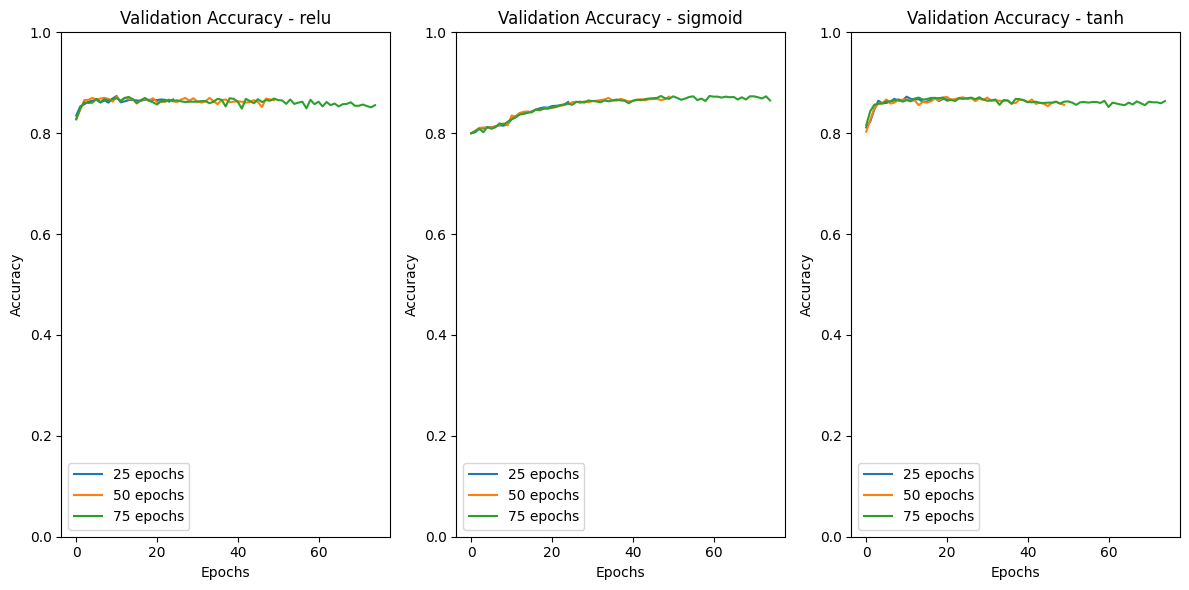

In [19]:
import matplotlib.pyplot as plt

# One subplot per activation function
activations = sorted(list(set([r[0] for r in results])))
epochs_list = sorted(list(set([r[1] for r in results])))

plt.figure(figsize=(12, 6))

for i, act in enumerate(activations):
    plt.subplot(1, len(activations), i+1)
    
    for act_r, ep, model, history in results:
        if act_r == act:
            plt.plot(history.history['val_accuracy'], label=f'{ep} epochs')
    
    plt.title(f'Validation Accuracy - {act}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()

plt.tight_layout()
plt.show()